In [1]:
import scanpy as sc 
import pandas as pd 
import numpy as np 
import os
import anndata
from umap import UMAP

/home/s4735100/mambaforge/lib/python3.10/site-packages/umap/distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/home/s4735100/mambaforge/lib/python3.10/site-packages/umap/distances.py:1071: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/home/s4735100/mambaforge/lib/python3.10/site-packages/umap/distances.py:1086: NumbaDepr

In [3]:
adata_discovery = sc.read_h5ad("/scratch/user/s4735100/Discovery_cohort.h5ad")
adata_discovery

/home/s4735100/mambaforge/lib/python3.10/site-packages/anndata/_core/anndata.py:121: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


AnnData object with n_obs × n_vars = 187361 × 33538
    obs: 'sanger_sample_id', 'disease_status', 'biopsy_type', 'age', 'sex', 'inflammation_status', 'smoking_status', 'bead_version', 'bead_lot', 'chip_version', 'chip_lot', 'lane', 'enzyme_lot_blp', 'gem_lot', 'f1_f2_ratio', 'log1p_n_genes_by_counts', 'log1p_total_counts', 'n_genes_by_counts', 'normalization_factor', 'pct_counts_gene_group__mito_transcript', 'cell_passes_qc', 'scrublet__multiplet_scores', 'scrublet__predicted_multiplet', 'predicted_celltype_probability', 'major_cell_type', 'predicted_celltype', 'label__machine', 'category__machine', 'medication_class', 'disease_status__machine'
    var: 'gene_symbols', 'feature_types', 'gene_group__mito_transcript', 'gene_group__mito_protein', 'gene_group__ribo_protein', 'gene_group__ribo_rna', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts'
    uns: 'cell_filtered_per_experiment'
    layers: 'counts', 'log1p_cp10k

In [4]:
samples_to_keep = ["5892STDY8039841"]
adata_mild = adata_discovery[adata_discovery.obs["sanger_sample_id"].isin(samples_to_keep)]

In [7]:
adata_mild

View of AnnData object with n_obs × n_vars = 3670 × 33538
    obs: 'sanger_sample_id', 'disease_status', 'biopsy_type', 'age', 'sex', 'inflammation_status', 'smoking_status', 'bead_version', 'bead_lot', 'chip_version', 'chip_lot', 'lane', 'enzyme_lot_blp', 'gem_lot', 'f1_f2_ratio', 'log1p_n_genes_by_counts', 'log1p_total_counts', 'n_genes_by_counts', 'normalization_factor', 'pct_counts_gene_group__mito_transcript', 'cell_passes_qc', 'scrublet__multiplet_scores', 'scrublet__predicted_multiplet', 'predicted_celltype_probability', 'major_cell_type', 'predicted_celltype', 'label__machine', 'category__machine', 'medication_class', 'disease_status__machine'
    var: 'gene_symbols', 'feature_types', 'gene_group__mito_transcript', 'gene_group__mito_protein', 'gene_group__ribo_protein', 'gene_group__ribo_rna', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts'
    uns: 'cell_filtered_per_experiment'
    layers: 'counts', 'log1p

In [6]:
adata_mild.obs['sanger_sample_id']. unique()

['5892STDY8039841']
Categories (1, object): ['5892STDY8039841']

In [8]:
sc.tl.pca(adata_mild, svd_solver="arpack")

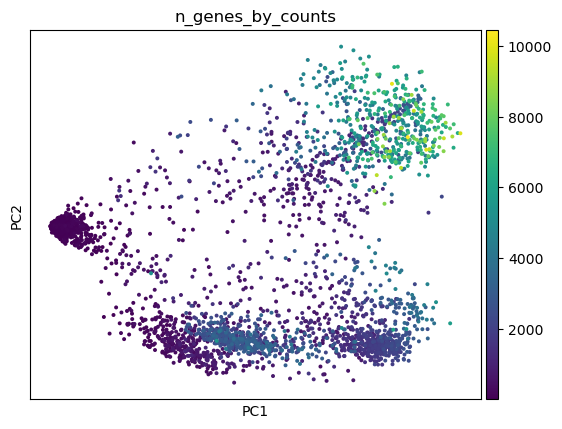

In [10]:
sc.pl.pca(adata_mild, color="n_genes_by_counts")

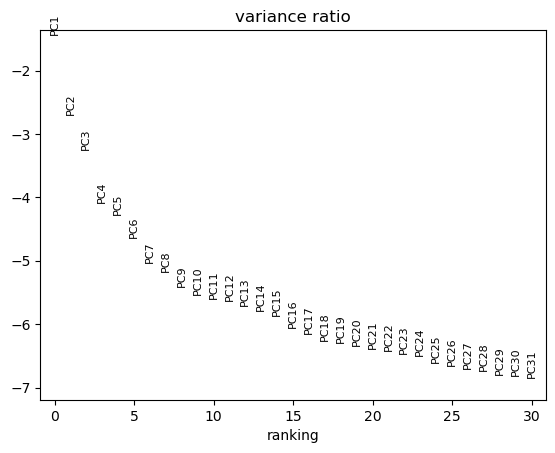

In [11]:
sc.pl.pca_variance_ratio(adata_mild, log=True)

In [12]:
sc.pp.neighbors(adata_mild, n_neighbors=10, n_pcs=40)

In [15]:
sc.tl.leiden(
    adata_mild,
    resolution=0.9,
    random_state=0,
    n_iterations=2,
    directed=False,
)

In [16]:
sc.tl.paga(adata_mild)
sc.pl.paga(adata_mild, plot=False)  # remove `plot=False` if you want to see the coarse-grained graph
sc.tl.umap(adata_mild, init_pos='paga')

In [18]:
sc.tl.umap(adata_mild)

/home/s4735100/mambaforge/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/s4735100/mambaforge/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


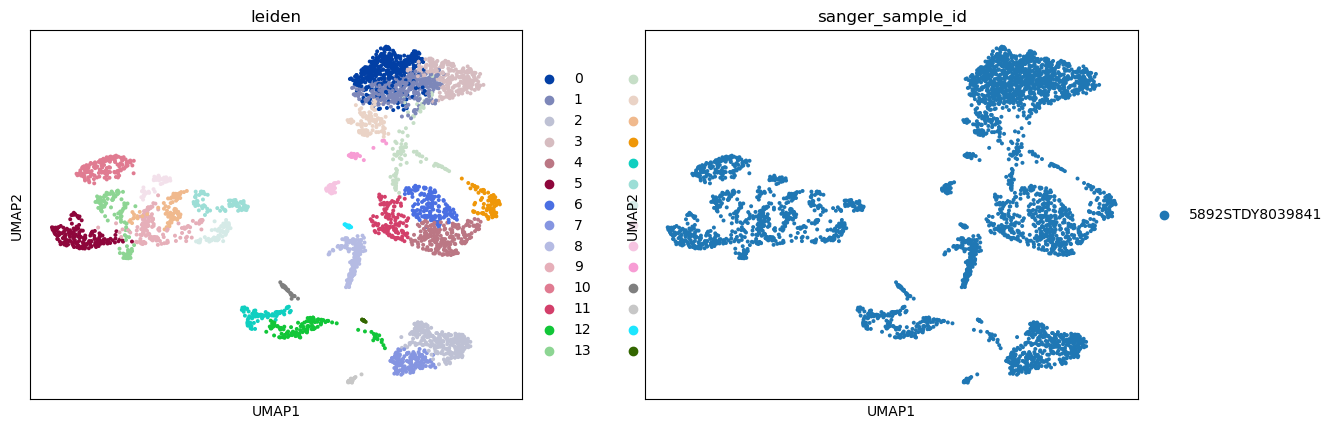

In [19]:
sc.pl.umap(adata_mild, color=["leiden","sanger_sample_id"])


In [20]:
mild_file = '/scratch/user/s4735100/mild.h5ad'
adata_mild.write(mild_file)

In [21]:
samples_to_keep_2 = ["Crohns_Disease_Collection_Study8727487","5892STDY8357647","5892STDY8039745"]
adata_moderate = adata_discovery[adata_discovery.obs["sanger_sample_id"].isin(samples_to_keep_2)]

In [22]:
adata_moderate.obs['sanger_sample_id']. unique()

['5892STDY8039745', '5892STDY8357647', 'Crohns_Disease_Collection_Study8727487']
Categories (3, object): ['5892STDY8039745', '5892STDY8357647', 'Crohns_Disease_Collection_Study8727487']

In [23]:
moderate_file = '/scratch/user/s4735100/moderate_extra_scoring.h5ad'
adata_moderate.write(moderate_file)

In [25]:
sc.tl.pca(adata_moderate, svd_solver="arpack")

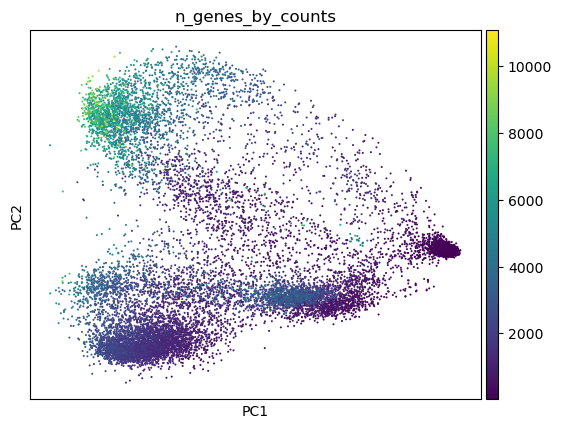

In [26]:
sc.pl.pca(adata_moderate, color="n_genes_by_counts")

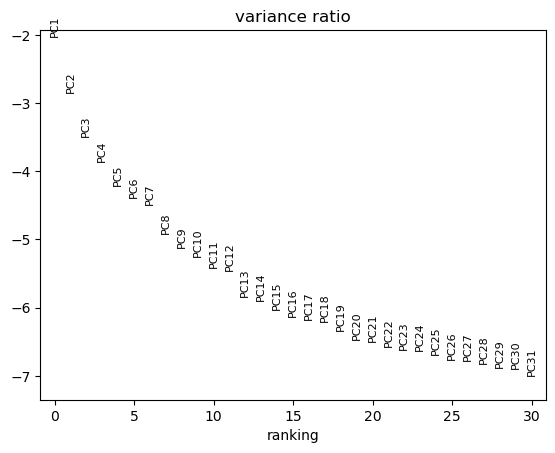

In [27]:
sc.pl.pca_variance_ratio(adata_moderate, log=True)

In [28]:
sc.pp.neighbors(adata_moderate, n_neighbors=10, n_pcs=40)


In [29]:
sc.tl.leiden(
    adata_moderate,
    resolution=0.9,
    random_state=0,
    n_iterations=2,
    directed=False,
)

In [30]:
sc.tl.paga(adata_moderate)
sc.pl.paga(adata_moderate, plot=False)  # remove `plot=False` if you want to see the coarse-grained graph
sc.tl.umap(adata_moderate, init_pos='paga')

In [31]:
sc.tl.umap(adata_moderate)


/home/s4735100/mambaforge/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/s4735100/mambaforge/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


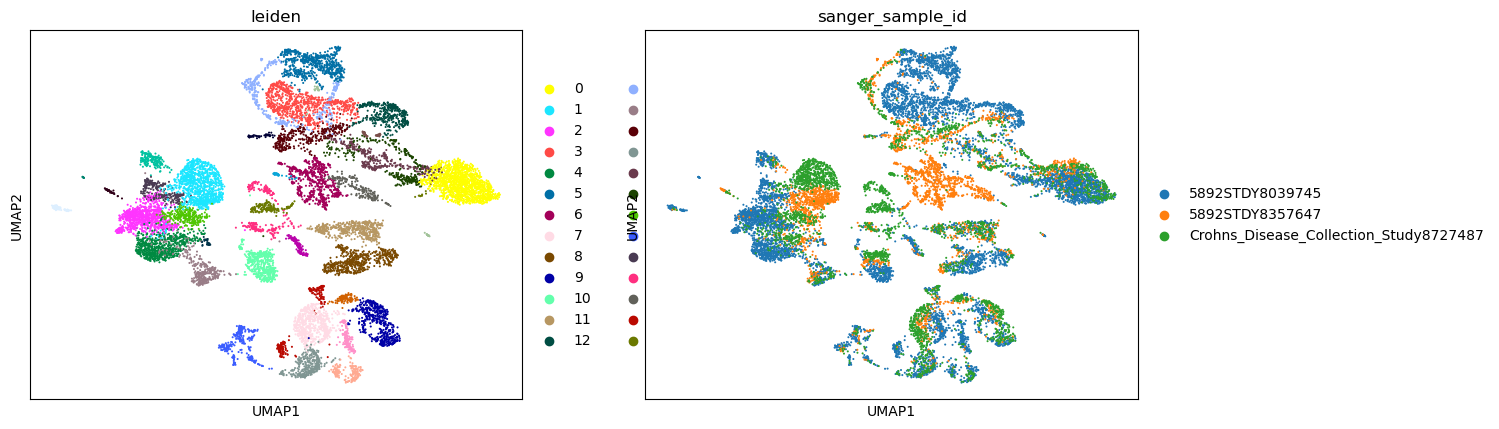

In [32]:
sc.pl.umap(adata_moderate, color=["leiden","sanger_sample_id"])


In [33]:
samples_to_keep_3 = ["5892STDY8357454","5892STDY8039649","5892STDY8357359"]
adata_severe = adata_discovery[adata_discovery.obs["sanger_sample_id"].isin(samples_to_keep_3)]

In [34]:
adata_severe.obs['sanger_sample_id']. unique()

['5892STDY8039649', '5892STDY8357359', '5892STDY8357454']
Categories (3, object): ['5892STDY8039649', '5892STDY8357359', '5892STDY8357454']

In [35]:
severe_file = '/scratch/user/s4735100/severe_extra_scoring.h5ad'
adata_severe.write(severe_file)

In [36]:
sc.tl.pca(adata_severe, svd_solver="arpack")

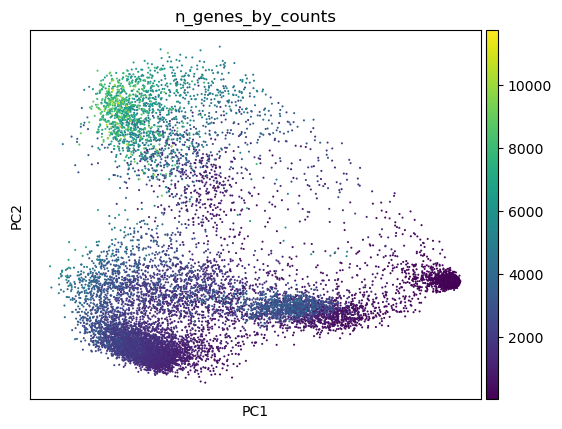

In [37]:
sc.pl.pca(adata_severe, color="n_genes_by_counts")

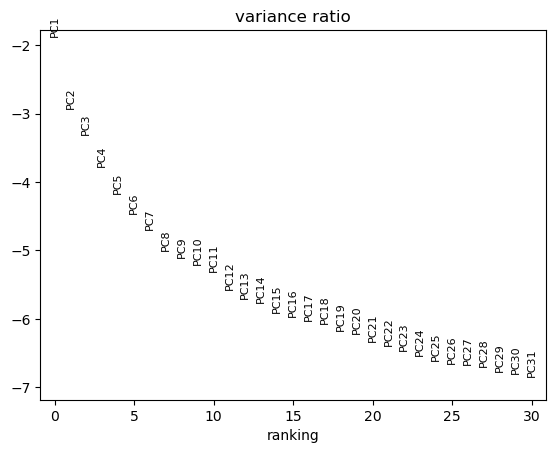

In [38]:
sc.pl.pca_variance_ratio(adata_severe, log=True)


In [39]:
sc.pp.neighbors(adata_severe, n_neighbors=10, n_pcs=40)


In [40]:
sc.tl.leiden(
    adata_severe,
    resolution=0.9,
    random_state=0,
    n_iterations=2,
    directed=False,
)

In [41]:
sc.tl.paga(adata_severe)
sc.pl.paga(adata_severe, plot=False)  # remove `plot=False` if you want to see the coarse-grained graph
sc.tl.umap(adata_severe, init_pos='paga')

In [42]:
sc.tl.umap(adata_severe)

/home/s4735100/mambaforge/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/s4735100/mambaforge/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


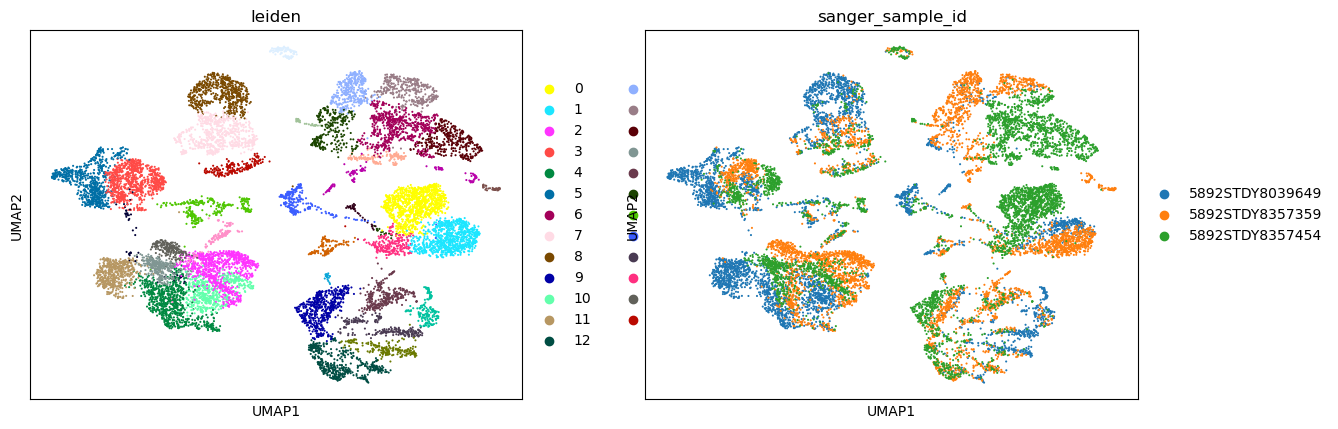

In [43]:
sc.pl.umap(adata_severe, color=["leiden","sanger_sample_id"])


In [44]:
samples_to_keep_4 = ["OTARscRNA9294504"]
adata_uninflamed = adata_discovery[adata_discovery.obs["sanger_sample_id"].isin(samples_to_keep_4)]

In [45]:
adata_uninflamed.obs['sanger_sample_id']. unique()

['OTARscRNA9294504']
Categories (1, object): ['OTARscRNA9294504']

In [46]:
uninflamed_file = '/scratch/user/s4735100/uninflamed.h5ad'
adata_uninflamed.write(uninflamed_file)

In [48]:
sc.tl.pca(adata_uninflamed, svd_solver="arpack")

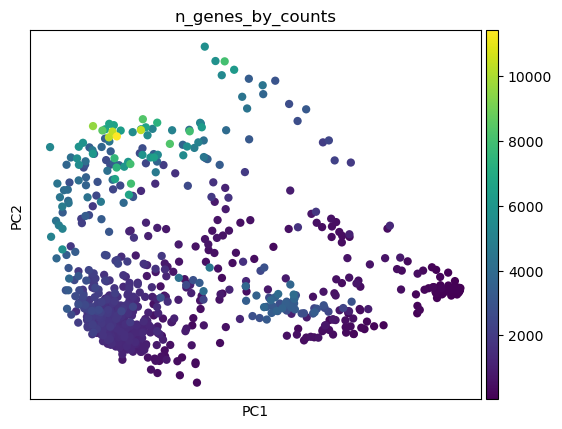

In [49]:
sc.pl.pca(adata_uninflamed, color="n_genes_by_counts")

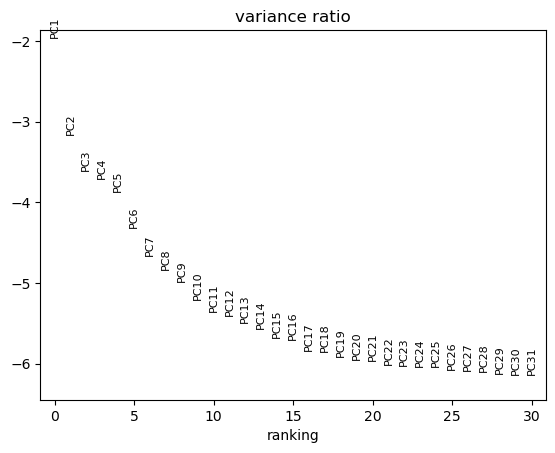

In [50]:
sc.pl.pca_variance_ratio(adata_uninflamed, log=True)

In [51]:
sc.pp.neighbors(adata_uninflamed, n_neighbors=10, n_pcs=40)


In [52]:
sc.tl.leiden(
    adata_uninflamed,
    resolution=0.9,
    random_state=0,
    n_iterations=2,
    directed=False,
)

In [53]:
sc.tl.paga(adata_uninflamed)
sc.pl.paga(adata_uninflamed, plot=False)  # remove `plot=False` if you want to see the coarse-grained graph
sc.tl.umap(adata_uninflamed, init_pos='paga')

In [54]:
sc.tl.umap(adata_uninflamed)


/home/s4735100/mambaforge/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/s4735100/mambaforge/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


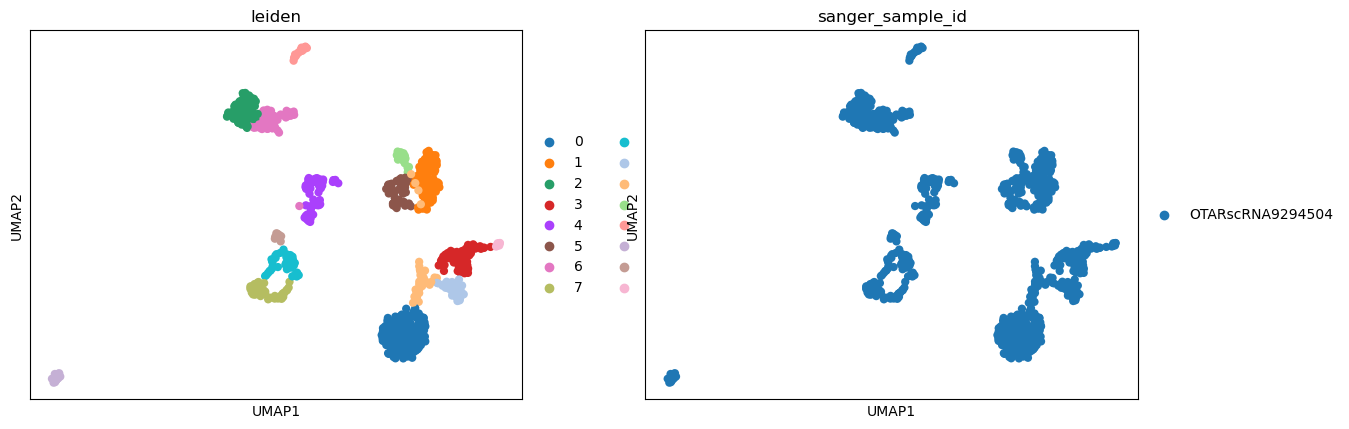

In [55]:
sc.pl.umap(adata_uninflamed, color=["leiden","sanger_sample_id"])
